In [1]:
from Exchange import *

In [2]:
# Interface
import exchange
env = exchange.make()
observation, info =  env.reset(return_info = True)
for _ in range(1000):
    action = policy(observation)
    observation, reward, done, info = env.step(action)
    if done:
        observation, info = env.reset(return_info = True)
env.close()

ModuleNotFoundError: No module named 'exchange'

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure
dir = "Data/"
filename = "AMZN_2021-04-01_34200000_57600000_message_10.csv"
Flow = pd.read_csv(dir + filename, names= ["time","type","id","quantity","price","direction","comment"])
# Book = pd.read_csv(dir+ filename)
# Flow = pd.read_csv(r"Data/AMZN_2021-04-01_34200000_57600000_message_10.csv")
# Book = pd.read_csv(r"Data/AMZN_2021-04-01_34200000_57600000_orderbook_10.csv")

/Users/kang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [143]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(dir+"Whole_Flow/") if isfile(join(dir+"Whole_Flow/", f))]
onlyfiles = sorted(onlyfiles)

In [145]:
rst = []

In [146]:
for index in range(len(onlyfiles)):
    dir = "Data/Whole_Flow/"
    filename = onlyfiles[index]
    Flow = pd.read_csv(dir + filename, names= ["time","type","id","quantity","price","direction","comment"])
    groupped = Flow.groupby(['type']).count()
    temp = pd.Series(list(groupped["time"]),index=np.arange(1,7))
    rst.append(temp)

In [147]:
Rst = pd.DataFrame(rst)
Rst["time"] = [onlyfiles[i][10:15] for i in range(len(onlyfiles))]

In [148]:
Rst.set_index("time",inplace=True)

In [149]:
Rst

,1,2,3,4,5,6
time,,,,,,
04-01,168313,66,153523,22954,16268,1
04-05,173619,89,158982,24313,17933,1
04-06,141907,79,130026,16939,12805,1
04-07,159848,81,146353,23946,19398,1
04-08,144596,53,132965,17046,16889,1
04-09,173243,104,156926,28307,23747,1
04-13,156768,1787,142342,22292,18562,1
04-14,142463,73,128948,20011,15271,1
04-15,166284,65,152105,20166,17916,1


In [ ]:
Rst

In [151]:
new

In [152]:
new

,Submission,Cancellation,Deletion,Excution,ExcutionHiddenOrder
time,,,,,
04-01,168313,66,153523,22954,16268
04-05,173619,89,158982,24313,17933
04-06,141907,79,130026,16939,12805
04-07,159848,81,146353,23946,19398
04-08,144596,53,132965,17046,16889
04-09,173243,104,156926,28307,23747
04-12,17187,3,14462,5389,3632
04-13,156768,1787,142342,22292,18562
04-14,142463,73,128948,20011,15271


In [153]:
total = new.apply(sum,axis=1)
total

time
04-01    361124
04-05    374936
04-06    301756
04-07    349626
04-08    311549
04-09    382327
04-12     40673
04-13    341751
04-14    306766
04-15    356536
04-16    362580
04-19    334312
04-20    323011
04-21    498581
04-22    341451
04-23    308980
04-26    323326
04-27    364803
dtype: int64

In [154]:
new = Rst.iloc[:,:-1]

In [161]:
new.columns = [
    "Submission",
    "Cancellation",
    "Deletion",
    "Excution",
    "ExcutionHiddenOrder",
]

In [162]:
new

,Submission,Cancellation,Deletion,Excution,ExcutionHiddenOrder
time,,,,,
04-01,168313,66,153523,22954,16268
04-05,173619,89,158982,24313,17933
04-06,141907,79,130026,16939,12805
04-07,159848,81,146353,23946,19398
04-08,144596,53,132965,17046,16889
04-09,173243,104,156926,28307,23747
04-13,156768,1787,142342,22292,18562
04-14,142463,73,128948,20011,15271
04-15,166284,65,152105,20166,17916


>>>epoch0, len of lst is 361124, len of lst2 is 361124
>>>epoch1, len of lst is 736060, len of lst2 is 736060
>>>epoch2, len of lst is 1037816, len of lst2 is 1037816
>>>epoch3, len of lst is 1387442, len of lst2 is 1387442
>>>epoch4, len of lst is 1698991, len of lst2 is 1698991
>>>epoch5, len of lst is 2081318, len of lst2 is 2081318
>>>epoch6, len of lst is 2423069, len of lst2 is 2423069
>>>epoch7, len of lst is 2729835, len of lst2 is 2729835
>>>epoch8, len of lst is 3086371, len of lst2 is 3086371
>>>epoch9, len of lst is 3448951, len of lst2 is 3448951
>>>epoch10, len of lst is 3783263, len of lst2 is 3783263
>>>epoch11, len of lst is 4106274, len of lst2 is 4106274
>>>epoch12, len of lst is 4604855, len of lst2 is 4604855
>>>epoch13, len of lst is 4946306, len of lst2 is 4946306
>>>epoch14, len of lst is 5255286, len of lst2 is 5255286
>>>epoch15, len of lst is 5578612, len of lst2 is 5578612
>>>epoch16, len of lst is 5943415, len of lst2 is 5943415


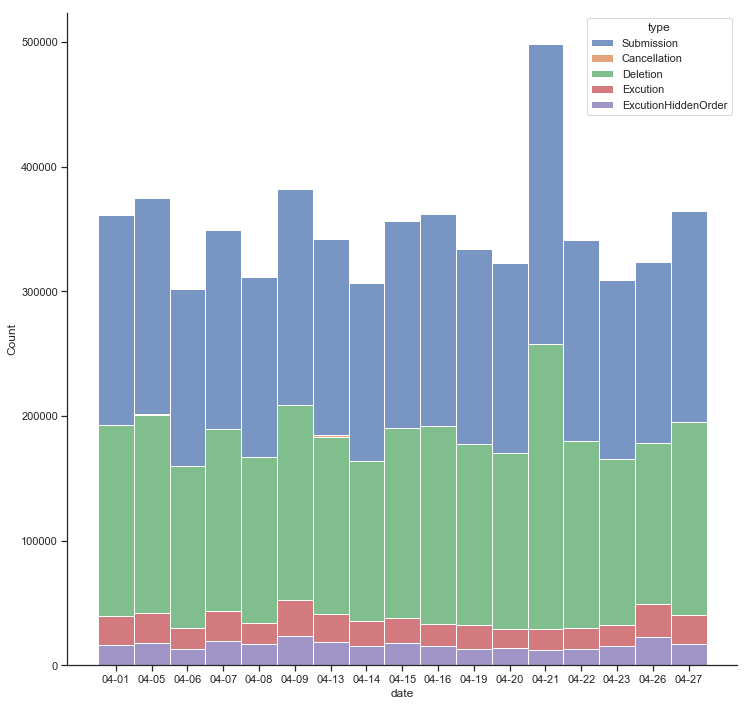

In [163]:
lst = []
lst2 = []
total = new.apply(sum,axis=1)
for i in range(new.shape[0]):
    for j in range(new.shape[1]):
        lst.extend([str(new.columns[j]) for _ in range(new.iloc[i,j])])
        # print(len(lst))
    temp = [new.index[i] for _ in range(total[i])]
    lst2.extend(temp)
    print(">>>epoch{0}, len of lst is {1}, len of lst2 is {2}".format(i,len(lst),len(lst2)))


New = pd.DataFrame([lst2,lst]).T
New.columns = ["date", "type"]

f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f)
sns.color_palette("Paired")
sns.histplot(data=New, x="date", hue="type", multiple="stack")

In [158]:
New

,date,type
0,04-01,1
1,04-01,1
2,04-01,1
3,04-01,1
4,04-01,1
...,...,...
5943410,04-27,5
5943411,04-27,5
5943412,04-27,5
5943413,04-27,5


In [87]:
# penguins = sns.load_dataset("penguins")

In [174]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')

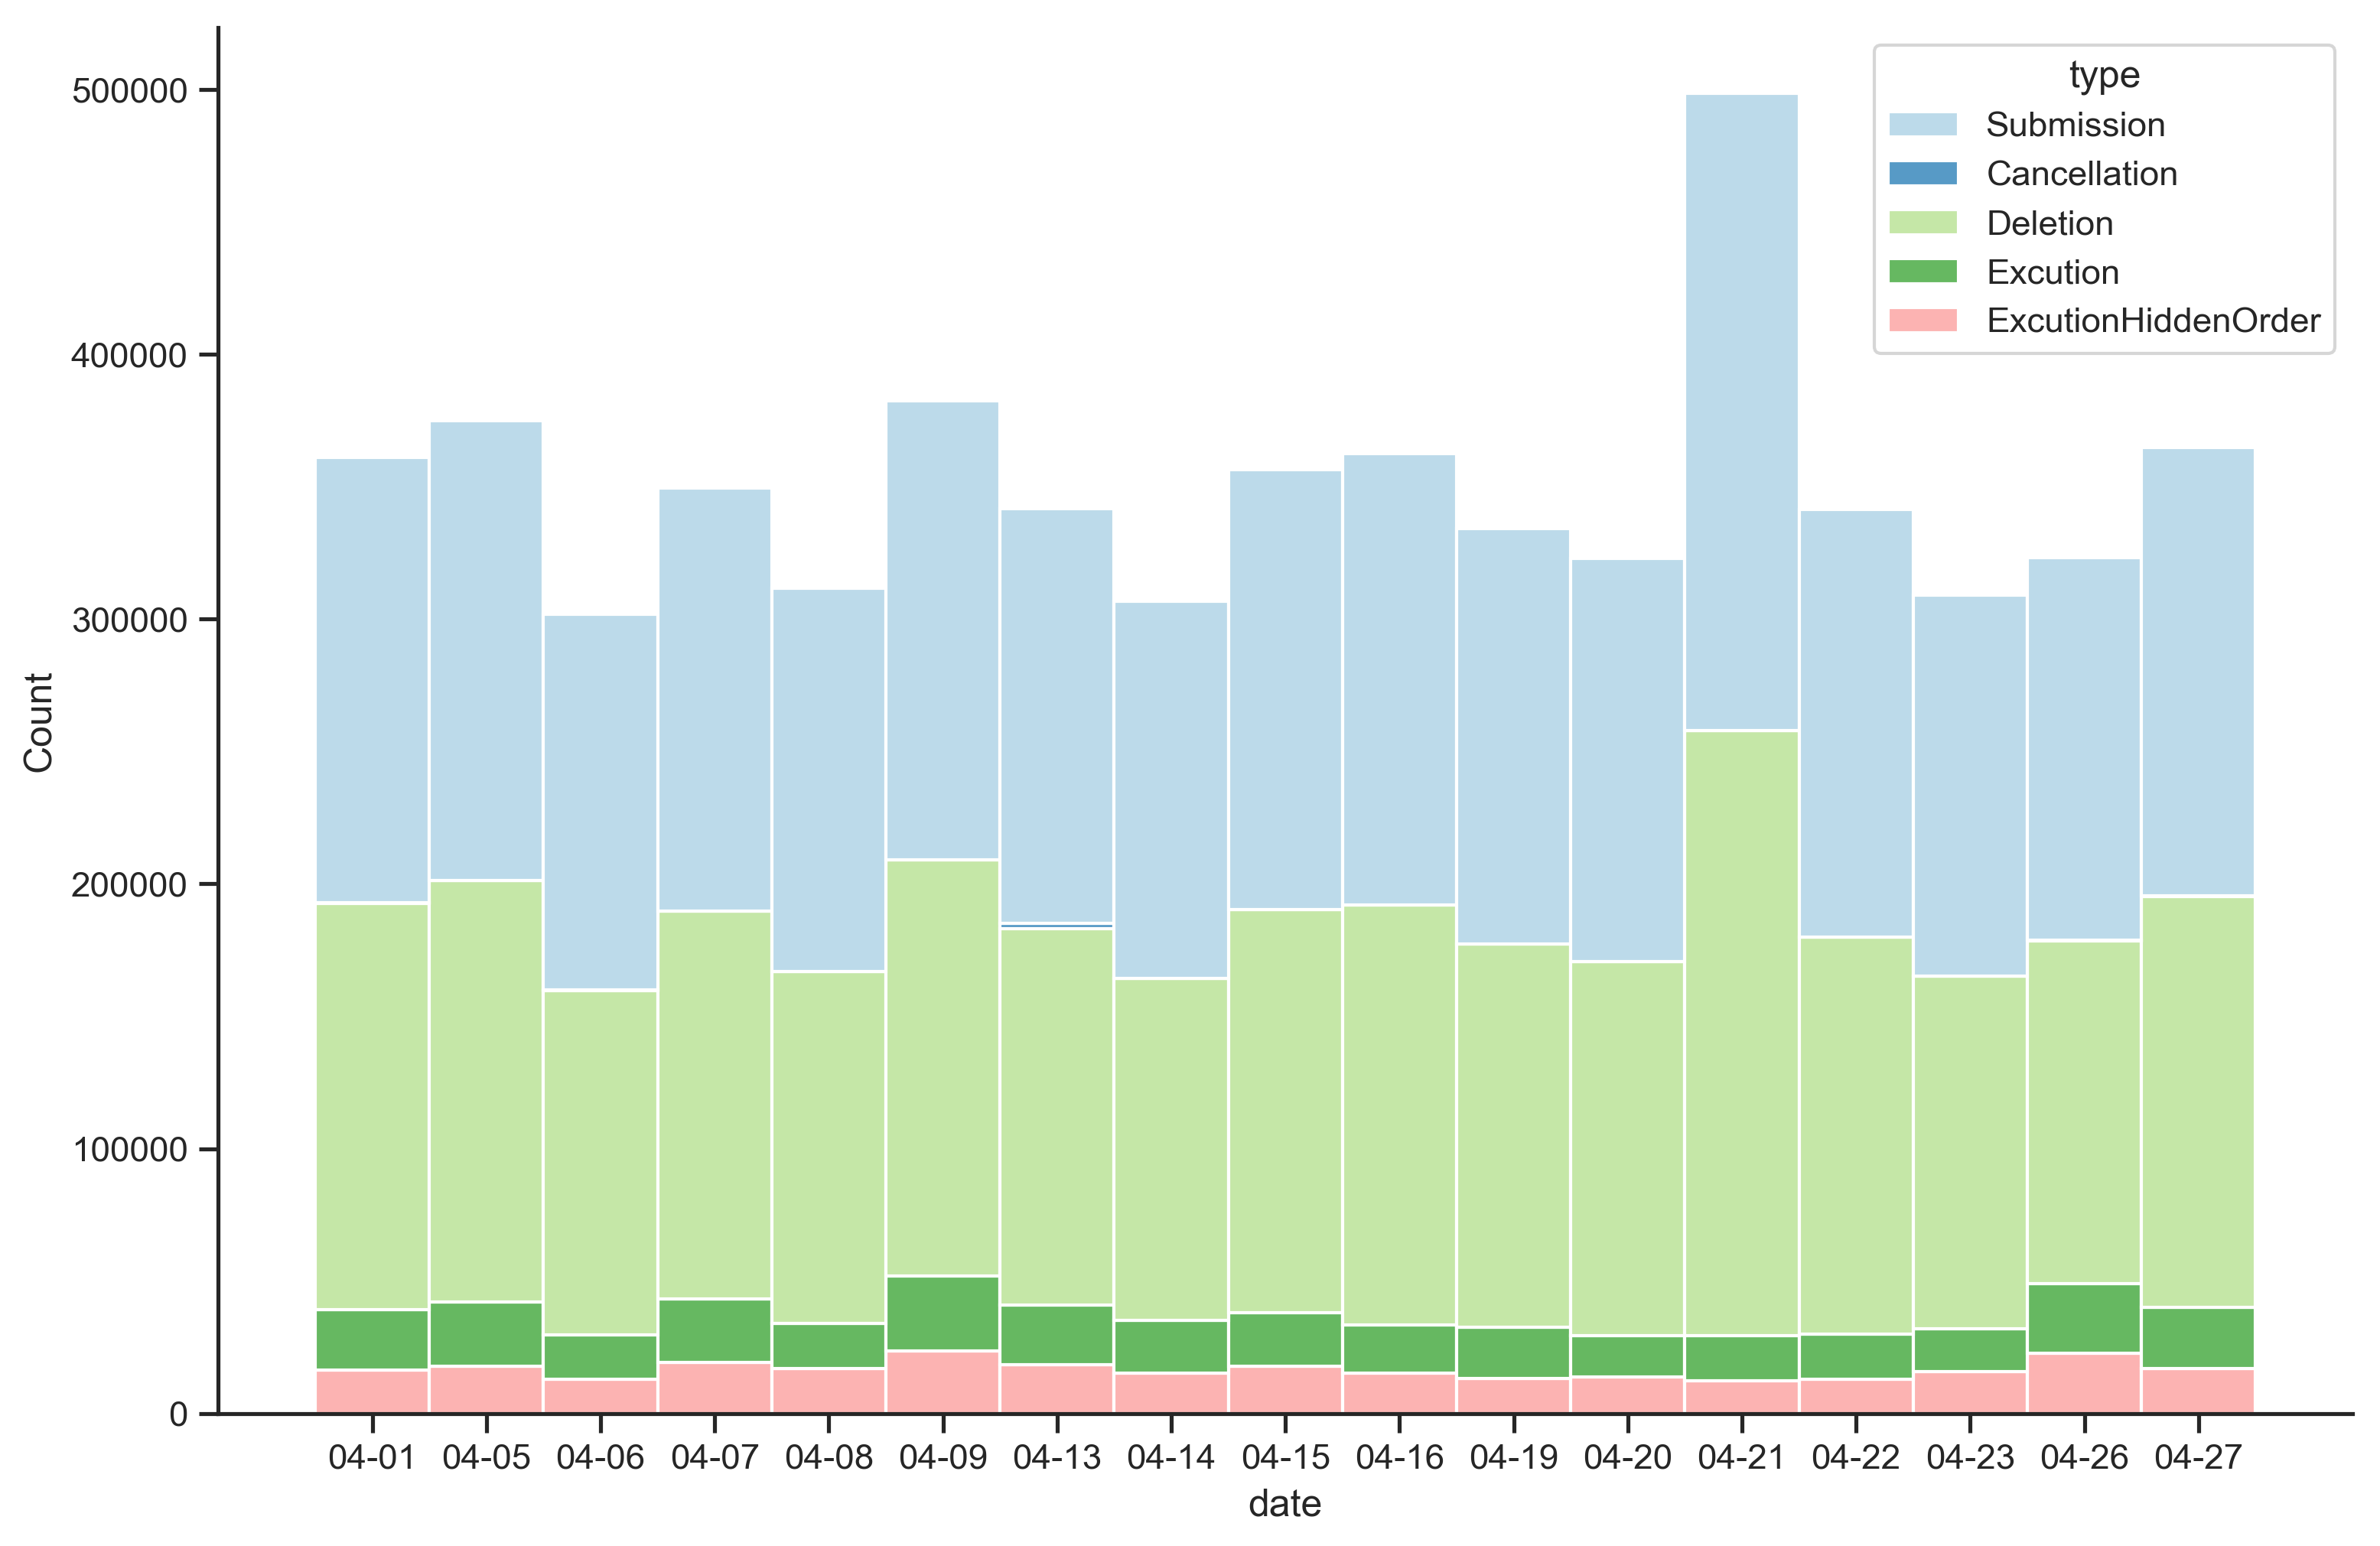

: 

In [175]:
sns.set_theme(style="ticks",palette="Paired")
f, ax = plt.subplots(figsize=(12, 8))
sns.despine(f)
# sns.color_palette("Paired")
# sns.color_palette("rocket", as_cmap=True)
sns.histplot(data=New, x="date", hue="type", multiple="stack")

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [ ]:
List = Flow.iloc[index,:].tolist()
if List[1]==3:

In [ ]:
picture_play_rate = 0.05
for index in range(Book.shape[0]):
    figure(figsize=(8, 6), dpi=80)
    price = Book.iloc[index,[i%2==0 for i in range(Book.shape[1])]]/10000.0
    quantity = Book.iloc[index,[i%2==1 for i in range(Book.shape[1])]]
    sc = pd.Series(quantity.tolist(), index = price.tolist())
    df = sc.sort_index()
    plt.step(df.index.tolist(), df.values.tolist())
    plt.hlines(0,min(df.index.tolist()),max(df.index.tolist()),color="red")
    plt.show()
    time.sleep(picture_play_rate)

In [ ]:
initial_order = (0, 3117.8, "AAPL", 20)
exchange = Exchange(*initial_order)
def slice(x):
    if x==1:
        return 'bid' 
    elif x==-1:
        return 'ask'

for index in range(Flow.shape[0]):
    List = Flow.iloc[index,:].tolist()
    if List[1]==1 and List[3]<=100 and (List[5]==1 or List[5]==-1):
        Tuple = tuple(
            (
            str(List[2]), # ticket id 
            '1', # order type, List[1]
            slice(List[5]),
            List[4]/10000.0, # price
            List[3], # quantity
            # List[0], # order time
            str(List[2]), # number
            "AMZN" # stock code
            )
            )
        order1= Order(*Tuple)
        Time = str(List[0])
        # if Tuple[2] == "ask":
        #     price = exchange.process_order_A(Time,order1)
        #     print(">>> Excuting ask order at time: ", Time)
        # elif Tuple[2] == "bid":
        price = exchange.process_order_B(Time,order1)
        print(">>> Excuting bid order at time: ", Time)
        print("Price:",price)

        bids = exchange.return_info()[2]
        asks = exchange.return_info()[3]
        Bids = pd.DataFrame(bids,columns=["price","quantity"])
        Asks = pd.DataFrame(asks,columns=["price","quantity"])
        New = pd.concat([Bids,Asks])
        New.set_index("price",inplace = True)
        plt.step(New.index.tolist(), New.values.tolist())
        plt.hlines(0,min(New.index.tolist()),max(New.index.tolist()),color="red")
        plt.show()

        time.sleep(0.05)

### The error comes from the ignore of the type3 order, which is the withdraw type.
As a result, we need to consider from the trader perspecitive.

### Pre-process the order flow to handle with the withdraw type order.

In [7]:
def handle_withdraw(Flow,buffer_len = 5):
    del_list = []
    for index in range(Flow.shape[0]):
    # index = 15 
        List = Flow.iloc[index,:].tolist()
        if List[1]==3:
            for i in range(1,min(buffer_len,index-1)):
                # print(">>>Flow.iloc[index - i,2]",Flow.iloc[index - i,2])
                # print("List[2]",List[2])
                if Flow.iloc[index - i,2] == List[2]:
                    del_list.append(index-i)
                    del_list.append(index)
                    break
            # print(">>>Index = {0}, del_list:{1}".format(index,len(del_list)))
            if index%100 ==0:
                print(">>>Index = {0}".format(index))
    return Flow.drop(del_list)

In [8]:
Flow2 =  handle_withdraw(Flow,buffer_len = 500)

>>>Index = 300
>>>Index = 1200
>>>Index = 1300
>>>Index = 1400
>>>Index = 1500
>>>Index = 1800
>>>Index = 1900
>>>Index = 2100
>>>Index = 2200
>>>Index = 2300
>>>Index = 2700
>>>Index = 3000
>>>Index = 3400
>>>Index = 3900
>>>Index = 4000
>>>Index = 4100
>>>Index = 4800
>>>Index = 4900
>>>Index = 5000
>>>Index = 5100
>>>Index = 5300
>>>Index = 5800
>>>Index = 6100
>>>Index = 6400
>>>Index = 6500
>>>Index = 7100
>>>Index = 7200
>>>Index = 7400
>>>Index = 7700
>>>Index = 8000
>>>Index = 8200
>>>Index = 8300
>>>Index = 8400
>>>Index = 8800
>>>Index = 9100
>>>Index = 9300
>>>Index = 9400
>>>Index = 9500
>>>Index = 9900
>>>Index = 10000
>>>Index = 10800
>>>Index = 11100
>>>Index = 11400
>>>Index = 11700
>>>Index = 11800
>>>Index = 12000
>>>Index = 12100
>>>Index = 12700
>>>Index = 12900
>>>Index = 13100
>>>Index = 13200
>>>Index = 13700
>>>Index = 14100
>>>Index = 14200
>>>Index = 14400
>>>Index = 14500
>>>Index = 14800
>>>Index = 14900
>>>Index = 15600
>>>Index = 15700
>>>Index = 16000
>>>

## order book data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure
dir = "Data/"
filename = "AMZN_2021-04-01_34200000_57600000_orderbook_10.csv"
Flow = pd.read_csv(dir + filename)

In [6]:
Flow.shape

(361124, 40)

In [15]:
price = Flow.iloc[:,[i%2==0 for i in range(Flow.shape[1])]]

In [19]:
price

,31180100,31161600,31190000,31160000,31200000,31152200,31210000,31151000,31214000,31150100,31220000,31150000,31229800,31140000,31230000,31130000,31237900,31120300,31240000,31120200
0,31180100,31161600,31190000,31160000,31200000,31152200,31210000,31151000,31214000,31150100,31220000,31150000,31229800,31140000,31230000,31130000,31237900,31120300,31240000,31120200
1,31190000,31161600,31200000,31160000,31210000,31152200,31214000,31151000,31220000,31150100,31229800,31150000,31230000,31140000,31237900,31130000,31240000,31120300,31240800,31120200
2,31190000,31161600,31200000,31160000,31210000,31152200,31214000,31151000,31220000,31150100,31229800,31150000,31230000,31140000,31237900,31130000,31240000,31120300,31240800,31120200
3,31190000,31161600,31200000,31160000,31210000,31155000,31214000,31152200,31220000,31151000,31229800,31150100,31230000,31150000,31237900,31140000,31240000,31130000,31240800,31120300
4,31190000,31161600,31200000,31160000,31210000,31155000,31214000,31152200,31220000,31151000,31229800,31150100,31230000,31150000,31237900,31140000,31240000,31130000,31240800,31120300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361119,31616900,31610100,31617800,31610000,31618400,31609900,31618800,31609800,31619500,31608600,31620000,31606500,31620800,31605800,31621400,31604500,31621600,31603900,31622200,31602500
361120,31616900,31610100,31617800,31610000,31618400,31609900,31618800,31609800,31619500,31608600,31620000,31606500,31620800,31605800,31621400,31604500,31621600,31603900,31622200,31602500
361121,31616900,31610100,31617800,31610000,31618400,31609900,31618800,31609800,31619500,31608600,31620000,31606500,31620800,31605800,31621400,31604500,31621600,31603900,31622200,31602500
361122,31616900,31610800,31617800,31610100,31618400,31610000,31618800,31609900,31619500,31609800,31620000,31608600,31620800,31606500,31621400,31605800,31621600,31604500,31622200,31603900


In [17]:
all_price = set(price)

In [18]:
len(all_price)

20